In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [21]:
df = mb.bindome.datasets.PBM.gcn4_dream_v11tcf()
df = df.sort_values(1, ascending=False).reset_index(drop=True)

In [22]:
df

,seq,0,1
0,TATTCCATGTAGACCGGCCATTGGACTATG,0,4
1,CCCTAGCGTTGATGGTATCGTAAGTGCGTC,0,4
2,TAATTAGTGGCTGCTTGTCGGAATGGGCAG,0,4
3,GAGGGGGCGTTACGCGTTGTGTAGACCTAA,0,4
4,AGGACCTCAGGTGGAATCTTTTTACTATTG,0,4
...,...,...,...
120091,ATATCAGAGAGACAGGACTTGTGACTTTGT,1,0
120092,ATATCAGAGGGCGTTCGAGGCTTGCTAGGC,1,0
120093,GGATGGGAGTGCCTTTTGGATGAAAGATTG,1,0
120094,GGATGGCTTGAGTAACCAAGGATTGCGTGG,1,0


In [23]:
# data = df.head(1000)
# data = df.sample(n=10000)
data = df.copy()

In [24]:
set(data[0])

{0, 1, 2}

In [25]:
n_rounds = 1

In [26]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [27]:
data

,seq,0,1
0,TATTCCATGTAGACCGGCCATTGGACTATG,0,4
1,CCCTAGCGTTGATGGTATCGTAAGTGCGTC,0,4
2,TAATTAGTGGCTGCTTGTCGGAATGGGCAG,0,4
3,GAGGGGGCGTTACGCGTTGTGTAGACCTAA,0,4
4,AGGACCTCAGGTGGAATCTTTTTACTATTG,0,4
...,...,...,...
120091,ATATCAGAGAGACAGGACTTGTGACTTTGT,1,0
120092,ATATCAGAGGGCGTTCGAGGCTTGCTAGGC,1,0
120093,GGATGGGAGTGCCTTTTGGATGAAAGATTG,1,0
120094,GGATGGCTTGAGTAACCAAGGATTGCGTGG,1,0


In [28]:
print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=10000, shuffle=True)

loading object (# entries) 120096


In [29]:
# train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [30]:
train.dataset.n_batches

1

In [31]:
df.shape

(120096, 3)

In [32]:
# df.shape

In [14]:
data_seeding = data.reindex(data[data.columns[1:]].sum(axis=1).sort_values(ascending=False).index).head(100000).reset_index(drop=True)
seed = mb.tl.get_seed(data_seeding, 15, n=500)
seed
# AG.ACA...TGT.CT

checking kmers at round 0 (100000, 3)
checking kmers at round 1 (100000, 3)


/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


'CGCTGAAGAGTCGTA'

In [15]:
len(seed)

15

In [16]:
# torch.autograd.set_detect_anomaly(True)

In [ ]:
print('here...')

# rounds 1
# batches 1
# enr_series True
next w 14
kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
mono grad 1 None
di grad 1 None
setting grad status of kernel at 2 to 0
mono grad 2 None
di grad 2 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)
activities
[[[1. 1.]
  [1. 1.]
  [1. 1.]]]


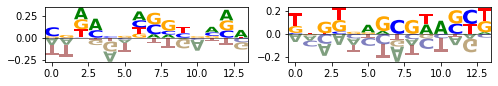

optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 2.0491 , best epoch: -1 secs per epoch: 0.992 s
Epoch: 11, Loss: 1.3113 , best epoch: 9 secs per epoch: 1.441 s
Epoch: 21, Loss: 0.9001 , best epoch: 19 secs per epoch: 1.362 s
Epoch: 31, Loss: 0.8459 , best epoch: 29 secs per epoch: 1.377 s
Epoch: 41, Loss: 0.8432 , best epoch: 35 secs per epoch: 1.430 s
Epoch: 51, Loss: 0.8421 , best epoch: 48 secs per epoch: 1.402 s
Epoch: 61, Loss: 0.8439 , best epoch: 50 secs per epoch: 1.392 s
Epoch: 71, Loss: 0.8429 , best epoch: 62 secs per epoch: 1.379 s
Epoch: 81, Loss: 0.8443 , best epoch: 62 secs per epoch: 1.369 s
Epoch: 91, Loss: 0.8437 , best epoch: 62 secs per epoch: 1.361 s
Epoch: 101, Loss: 0.8430 , best epoch: 62 secs per epoch: 1.359 s
Epoch: 111, Loss: 0.8433 , best epoch: 105 secs per epoch: 1.374 s
Epoch: 121, Loss: 0.8429 , best epoch: 105 secs per epoch: 1.373 s
Epoch: 131, Loss: 0.8427 , best epoch: 105 secs per epoch: 1.425 s
Epoch: 141, Loss: 0.8432 , best epo

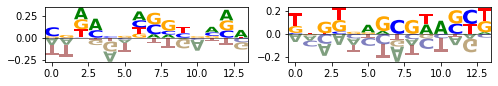

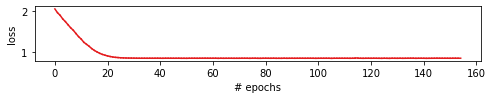

after shift optimz model
log_etas
Parameter containing:
tensor([[ 2.7827, -2.7827]], device='cuda:0', requires_grad=True)
activities
[[[1.0000008  0.98558146]
  [1.         1.        ]
  [1.         1.        ]]]


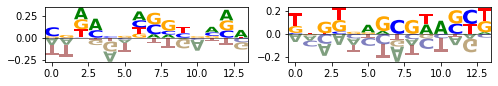

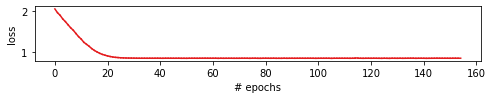


kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
mono grad 1 None
di grad 1 None
setting grad status of kernel at 2 to 0
mono grad 2 None
di grad 2 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[ 2.7827, -2.7827]], device='cuda:0', requires_grad=True)
activities
[[[1.0000008  0.98558146]
  [1.         1.        ]
  [1.         1.        ]]]


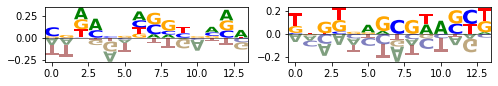

optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 0.8430 , best epoch: -1 secs per epoch: 1.613 s
Epoch: 11, Loss: 0.8424 , best epoch: 7 secs per epoch: 1.900 s
Epoch: 21, Loss: 0.8403 , best epoch: 19 secs per epoch: 1.789 s
Epoch: 31, Loss: 0.8342 , best epoch: 27 secs per epoch: 1.756 s
Epoch: 41, Loss: 0.8318 , best epoch: 37 secs per epoch: 1.718 s
Epoch: 51, Loss: 0.8309 , best epoch: 37 secs per epoch: 1.709 s
Epoch: 61, Loss: 0.8299 , best epoch: 56 secs per epoch: 1.674 s
Epoch: 71, Loss: 0.8323 , best epoch: 56 secs per epoch: 1.684 s
Epoch: 81, Loss: 0.8329 , best epoch: 56 secs per epoch: 1.686 s
Epoch: 91, Loss: 0.8303 , best epoch: 56 secs per epoch: 1.683 s
Epoch: 101, Loss: 0.8308 , best epoch: 56 secs per epoch: 1.721 s
Epoch: 107, Loss: 0.8327 , best epoch: 56 secs per epoch: 1.726 s
early stop!
after kernel opt / before shift optim.
log_etas
Parameter containing:
tensor([[ 2.7266, -2.7266]], device='cuda:0', requires_grad=True)
activities
[[[1.000000

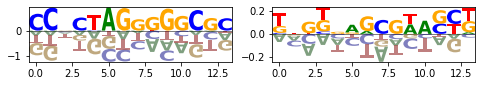

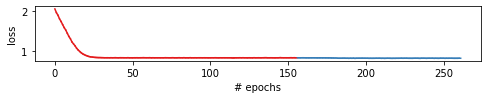


optimize_motif_shift (first)...left
mono grad 1 None
di grad 1 None
mono grad 2 None
di grad 2 None
optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 0.8307 , best epoch: -1 secs per epoch: 1.761 s
Epoch: 11, Loss: 0.8317 , best epoch: 1 secs per epoch: 1.915 s
Epoch: 21, Loss: 0.8311 , best epoch: 1 secs per epoch: 1.757 s
Epoch: 31, Loss: 0.8356 , best epoch: 1 secs per epoch: 1.729 s
Epoch: 41, Loss: 0.8316 , best epoch: 1 secs per epoch: 1.722 s
Epoch: 51, Loss: 0.8320 , best epoch: 1 secs per epoch: 1.685 s
Epoch: 52, Loss: 0.8331 , best epoch: 1 secs per epoch: 1.682 s
early stop!
right
mono grad 1 None
di grad 1 None
mono grad 2 None
di grad 2 None
optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 0.8330 , best epoch: -1 secs per epoch: 1.478 s
Epoch: 11, Loss: 0.8310 , best epoch: 8 secs per epoch: 1.734 s
Epoch: 21, Loss: 0.8307 , best epoch: 14 secs per epoch: 1.683 s
Epoch: 31, Loss: 0.8320 , best epoch: 14 secs per epoch: 1.760 s
Epoch: 41, 

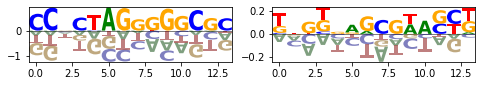

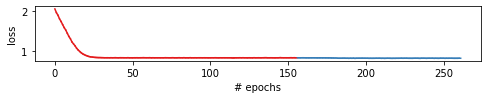


kernel to optimize 2

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 0
mono grad 1 None
di grad 1 None
setting grad status of kernel at 2 to 1
mono grad 2 None
di grad 2 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[ 2.7266, -2.7266]], device='cuda:0', requires_grad=True)
activities
[[[1.0000008  0.98558146]
  [0.99999946 0.7755379 ]
  [1.         1.        ]]]


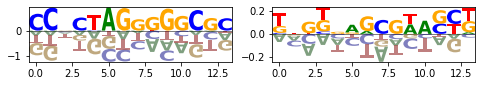

optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 0.8296 , best epoch: -1 secs per epoch: 1.433 s
Epoch: 11, Loss: 0.8305 , best epoch: 1 secs per epoch: 1.555 s
Epoch: 21, Loss: 0.8286 , best epoch: 1 secs per epoch: 1.582 s
Epoch: 31, Loss: 0.8300 , best epoch: 21 secs per epoch: 1.581 s
Epoch: 41, Loss: 0.8321 , best epoch: 21 secs per epoch: 1.555 s
Epoch: 51, Loss: 0.8292 , best epoch: 21 secs per epoch: 1.545 s
Epoch: 61, Loss: 0.8311 , best epoch: 21 secs per epoch: 1.537 s
Epoch: 71, Loss: 0.8290 , best epoch: 21 secs per epoch: 1.529 s
Epoch: 72, Loss: 0.8302 , best epoch: 21 secs per epoch: 1.531 s
early stop!
after kernel opt / before shift optim.
log_etas
Parameter containing:
tensor([[ 2.5516, -2.5516]], device='cuda:0', requires_grad=True)
activities
[[[1.0000008  0.98558146]
  [0.99999946 0.7755379 ]
  [0.9999979  0.87594706]]]


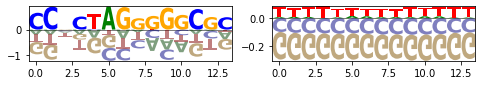

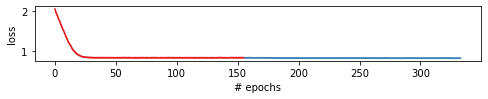


optimize_motif_shift (first)...left
mono grad 1 None
di grad 1 None
mono grad 2 None
di grad 2 None
optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 0.8310 , best epoch: -1 secs per epoch: 1.417 s
Epoch: 11, Loss: 0.8295 , best epoch: 9 secs per epoch: 1.739 s
Epoch: 21, Loss: 0.8279 , best epoch: 11 secs per epoch: 1.588 s
Epoch: 31, Loss: 0.8295 , best epoch: 11 secs per epoch: 1.558 s
Epoch: 41, Loss: 0.8327 , best epoch: 11 secs per epoch: 1.502 s
Epoch: 51, Loss: 0.8275 , best epoch: 11 secs per epoch: 1.500 s
Epoch: 61, Loss: 0.8300 , best epoch: 50 secs per epoch: 1.501 s
Epoch: 71, Loss: 0.8305 , best epoch: 62 secs per epoch: 1.505 s
Epoch: 81, Loss: 0.8302 , best epoch: 62 secs per epoch: 1.497 s
Epoch: 91, Loss: 0.8309 , best epoch: 62 secs per epoch: 1.493 s
Epoch: 101, Loss: 0.8276 , best epoch: 62 secs per epoch: 1.483 s
Epoch: 111, Loss: 0.8294 , best epoch: 62 secs per epoch: 1.495 s
Epoch: 113, Loss: 0.8309 , best epoch: 62 secs per epoch: 1.500 s
ear

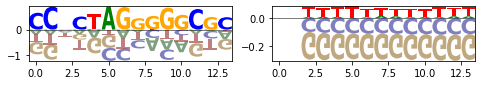

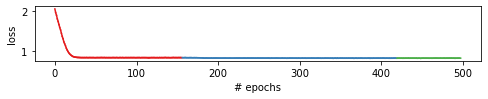


done....


In [41]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1
model_by_k_next, res_next = mb.tl.train_iterative(train, device, min_w=14, show_logo=True,
                                                  num_epochs=300, early_stopping=50, use_dinuc=False, # optimiser=torch.optim.LBFGS,
                                                  max_w=15, n_kernels=3, log_each=10) #  seed=seed) # seeds.index[0]) # 
print('done....')
# res = []
# model_by_k = {}
